## Strong And Weak Companies During A Recession: A Case Study Of The COVID-19 Pandemic

### Project Overview:

- The COVID-19 pandemic in 2020 caused an extreme shock to the global economy and financial markets, leading to contrasting stock price movements across different sectors. This project aims to analyze the stock price fluctuations of the S&P 500 companies, identify strong and relatively weak companies during a recession, and derive common characteristics based on their stock growth rates.

### Key Questions:

- What are the characteristics and causes of stock price decline among companies in the Consumer Staples sector, which performed well during the COVID-19 pandemic?

- What are the characteristics and causes of stock price increases among companies in the Energy sector, which performed poorly during the COVID-19 pandemic?

- What common factors can be identified from the above two cases?

### Project Progression Steps

#### Step 1: Data Collection and Cleaning

- Obtain a list of the S&P 500 companies, select relevant information, and categorize the companies into the Consumer Staples sector, which performed relatively well during the COVID-19 period, and the Energy sector, which was vulnerable.

#### Step 2: Data Analysis & Visualization

1. List stock price growth rates for the Consumer Staples sector, which performed strongly during the COVID-19 period -> Select the 5 companies with the lowest growth rates.

2. List stock price growth rates for the Energy sector, which performed poorly during the COVID-19 period -> Select the 5 companies with the highest growth rates.

3. Visualize the listed stock price growth rates for each sector using Scatter Plots.

4. Visualize the 5 companies with the lowest and highest growth rates, as identified in the data analysis step, using line charts.

5. For the company with the lowest growth rate in the Consumer Staples sector, display a wider date range in the stock price chart and analyze the reasons for the price decline.

6. For the company with the highest growth rate in the Energy sector, display a wider date range in the stock price chart and analyze the reasons for the price increase.

#### Step 3: Conclusion

- Investigate the conditions required to identify strong companies during economic recessions, particularly in exceptional situations like the COVID-19 pandemic.
  
- Through this project, we aim to identify companies with high resilience during recession, providing insights for portfolio rebalancing strategies in future macroeconomic shocks.

In [1349]:
import pandas               as pd
import yfinance             as yf
import matplotlib.pyplot    as plt
import plotly.graph_objects as go
import seaborn              as sns

# 1. Data Collection and Cleaning  
# Retrieve the list of S&P 500 companies from Wikipedia  
url      = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables   = pd.read_html(url)
sp500_df = tables[0]
sp500_df.replace("BF.B", "BF-B", inplace=True)  # Change the Ticker Name from BF.B to BF-B as It Appears on Yahoo Finance
sp500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [1351]:
# Retrieve Sector Names
sector = sp500_df["GICS Sector"].unique()
sector

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [1353]:
# Select Required Columns (Symbol, Security, GICS Sector)
snp500_df         = sp500_df[["Symbol", "Security", "GICS Sector", "GICS Sub-Industry", "Date added"]]
snp500_df.columns = ["Ticker", "Company", "Sector", "Sector2", "Addition"]

snp500_df

,Ticker,Company,Sector,Sector2,Addition
0,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1957-03-04
3,ABBV,AbbVie,Health Care,Biotechnology,2012-12-31
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,2011-07-06
...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,2011-11-01
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,1997-10-06
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,2019-12-23
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,2001-08-07


In [1355]:
# Filter S&P 500 Inclusion Date Up to 2020-01-29
snp500_df.loc[:, "Addition"] = pd.to_datetime(snp500_df["Addition"], errors="coerce")
snp500_df1                   = snp500_df[snp500_df["Addition"] <= pd.Timestamp("2020-01-29")]
snp500_df1

,Ticker,Company,Sector,Sector2,Addition
0,MMM,3M,Industrials,Industrial Conglomerates,1957-03-04 00:00:00
1,AOS,A. O. Smith,Industrials,Building Products,2017-07-26 00:00:00
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1957-03-04 00:00:00
3,ABBV,AbbVie,Health Care,Biotechnology,2012-12-31 00:00:00
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,2011-07-06 00:00:00
...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,2011-11-01 00:00:00
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,1997-10-06 00:00:00
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,2019-12-23 00:00:00
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,2001-08-07 00:00:00


In [1357]:
# Extract List of Companies in Strong Sectors During Recession
strong    = ["Consumer Staples"]
strong_df = snp500_df1[snp500_df1["Sector"].isin(strong)].copy()
strong_df

,Ticker,Company,Sector,Sector2,Addition
21,MO,Altria,Consumer Staples,Tobacco,1957-03-04 00:00:00
43,ADM,Archer Daniels Midland,Consumer Staples,Agricultural Products & Services,1957-03-04 00:00:00
74,BF-B,Brown–Forman,Consumer Staples,Distillers & Vintners,1982-10-31 00:00:00
82,CPB,Campbell's Company (The),Consumer Staples,Packaged Foods & Meats,1957-03-04 00:00:00
102,CHD,Church & Dwight,Consumer Staples,Household Products,2015-12-29 00:00:00
109,CLX,Clorox,Consumer Staples,Household Products,1969-03-31 00:00:00
112,KO,Coca-Cola Company (The),Consumer Staples,Soft Drinks & Non-alcoholic Beverages,1957-03-04 00:00:00
114,CL,Colgate-Palmolive,Consumer Staples,Household Products,1957-03-04 00:00:00
116,CAG,Conagra Brands,Consumer Staples,Packaged Foods & Meats,1983-08-31 00:00:00
119,STZ,Constellation Brands,Consumer Staples,Distillers & Vintners,2005-07-01 00:00:00


In [1359]:
# Extract List of Companies in Weak Sectors During Recession
weak    = ["Energy"]
weak_df = snp500_df1[snp500_df1["Sector"].isin(weak)].copy()
weak_df

,Ticker,Company,Sector,Sector2,Addition
37,APA,APA Corporation,Energy,Oil & Gas Exploration & Production,1997-07-28 00:00:00
55,BKR,Baker Hughes,Energy,Oil & Gas Equipment & Services,2017-07-07 00:00:00
99,CVX,Chevron Corporation,Energy,Integrated Oil & Gas,1957-03-04 00:00:00
117,COP,ConocoPhillips,Energy,Oil & Gas Exploration & Production,1957-03-04 00:00:00
128,CTRA,Coterra,Energy,Oil & Gas Exploration & Production,2008-06-23 00:00:00
142,DVN,Devon Energy,Energy,Oil & Gas Exploration & Production,2000-08-30 00:00:00
144,FANG,Diamondback Energy,Energy,Oil & Gas Exploration & Production,2018-12-03 00:00:00
169,EOG,EOG Resources,Energy,Oil & Gas Exploration & Production,2000-11-02 00:00:00
186,XOM,ExxonMobil,Energy,Integrated Oil & Gas,1957-03-04 00:00:00
221,HAL,Halliburton,Energy,Oil & Gas Equipment & Services,1957-03-04 00:00:00


In [1361]:
# Check DataFrame Information
strong_df.info()
weak_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 21 to 481
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ticker    35 non-null     object
 1   Company   35 non-null     object
 2   Sector    35 non-null     object
 3   Sector2   35 non-null     object
 4   Addition  35 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 37 to 493
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ticker    19 non-null     object
 1   Company   19 non-null     object
 2   Sector    19 non-null     object
 3   Sector2   19 non-null     object
 4   Addition  19 non-null     object
dtypes: object(5)
memory usage: 912.0+ bytes


In [1363]:
# 2. Data Analysis & Visualization -> Set the period to 1 year after WHO's pandemic declaration (2020-01-30)
def get_who_price(ticker, start_date="2020-01-30", end_date="2021-01-29"):
    try:
        stock = yf.Ticker(ticker)
        df    = stock.history(start=start_date, end=end_date)

        if df.empty:
            return None

        start_price = df["Close"].iloc[0]
        end_price   = df["Close"].iloc[-1]
        growth_rate = ((end_price - start_price) / start_price) * 100 # Stock Price Growth Rate
        return growth_rate

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [1365]:
# Calculate and Sort Stock Price Growth Rate for strong_df
strong_df["Growth Rate"]  = strong_df["Ticker"].apply(lambda ticker: get_who_price(ticker))
stong_who_df         = strong_df.dropna().sort_values(by="Growth Rate", ascending=False)

stong_who_df

,Ticker,Company,Sector,Sector2,Addition,Growth Rate
436,TGT,Target Corporation,Consumer Staples,Consumer Staples Merchandise Retail,1976-12-31 00:00:00,63.331067
109,CLX,Clorox,Consumer Staples,Household Products,1969-03-31 00:00:00,37.283723
325,MNST,Monster Beverage,Consumer Staples,Soft Drinks & Non-alcoholic Beverages,2012-06-28 00:00:00,32.413073
279,KR,Kroger,Consumer Staples,Food Retail,1957-03-04 00:00:00,31.164116
147,DG,Dollar General,Consumer Staples,Consumer Staples Merchandise Retail,2012-12-03 00:00:00,27.751206
481,WMT,Walmart,Consumer Staples,Consumer Staples Merchandise Retail,1982-08-31 00:00:00,25.364274
177,EL,Estée Lauder Companies (The),Consumer Staples,Personal Care Products,2006-01-05 00:00:00,24.215568
102,CHD,Church & Dwight,Consumer Staples,Household Products,2015-12-29 00:00:00,20.823649
278,KHC,Kraft Heinz,Consumer Staples,Packaged Foods & Meats,2015-07-06 00:00:00,19.638013
127,COST,Costco,Consumer Staples,Consumer Staples Merchandise Retail,1993-10-01 00:00:00,19.405605


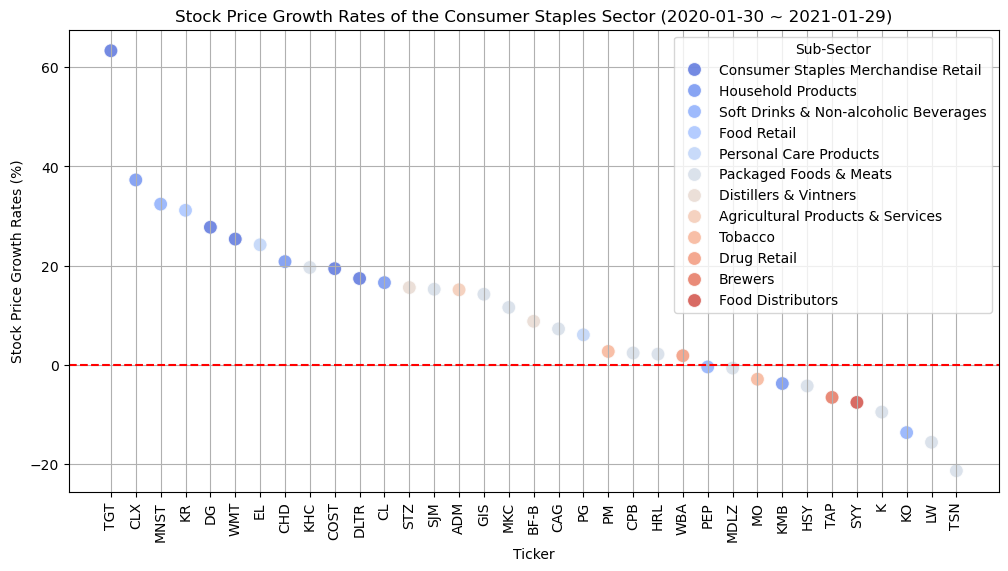

,Ticker,Company,Sector,Sector2,Addition,Growth Rate
436,TGT,Target Corporation,Consumer Staples,Consumer Staples Merchandise Retail,1976-12-31 00:00:00,63.331067
109,CLX,Clorox,Consumer Staples,Household Products,1969-03-31 00:00:00,37.283723
325,MNST,Monster Beverage,Consumer Staples,Soft Drinks & Non-alcoholic Beverages,2012-06-28 00:00:00,32.413073
279,KR,Kroger,Consumer Staples,Food Retail,1957-03-04 00:00:00,31.164116
147,DG,Dollar General,Consumer Staples,Consumer Staples Merchandise Retail,2012-12-03 00:00:00,27.751206
481,WMT,Walmart,Consumer Staples,Consumer Staples Merchandise Retail,1982-08-31 00:00:00,25.364274
177,EL,Estée Lauder Companies (The),Consumer Staples,Personal Care Products,2006-01-05 00:00:00,24.215568
102,CHD,Church & Dwight,Consumer Staples,Household Products,2015-12-29 00:00:00,20.823649
278,KHC,Kraft Heinz,Consumer Staples,Packaged Foods & Meats,2015-07-06 00:00:00,19.638013
127,COST,Costco,Consumer Staples,Consumer Staples Merchandise Retail,1993-10-01 00:00:00,19.405605


In [1366]:
# List Stock Price Growth Rates for the Consumer Staples Sector, Which Performed Strongly During COVID-19
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stong_who_df, x="Ticker", y="Growth Rate", hue="Sector2", palette="coolwarm", s=100, alpha=0.8)
plt.axhline(0, color='red', linestyle='--')

plt.xticks(rotation=90)
plt.title("Stock Price Growth Rates of the Consumer Staples Sector (2020-01-30 ~ 2021-01-29)")
plt.xlabel("Ticker")
plt.ylabel("Stock Price Growth Rates (%)")
plt.legend(title="Sub-Sector", bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

stong_who_df

I visualized the stock price growth rates of Consumer Staples sector using a Scatter Plot.

In terms of stock price growth rates, more than half of the companies recorded positive returns, with particularly strong performance observed in sectors such as Consumer Staples Merchandise Retail, Household Products, Beverages, and Food Retail, which are essential to our daily lives.

In [1370]:
# Display the Top 5 Stocks with the Highest Growth Rates
print("strong_who_df TOP 5")
stong_who_df.head(5)

strong_who_df TOP 5


,Ticker,Company,Sector,Sector2,Addition,Growth Rate
436,TGT,Target Corporation,Consumer Staples,Consumer Staples Merchandise Retail,1976-12-31 00:00:00,63.331067
109,CLX,Clorox,Consumer Staples,Household Products,1969-03-31 00:00:00,37.283723
325,MNST,Monster Beverage,Consumer Staples,Soft Drinks & Non-alcoholic Beverages,2012-06-28 00:00:00,32.413073
279,KR,Kroger,Consumer Staples,Food Retail,1957-03-04 00:00:00,31.164116
147,DG,Dollar General,Consumer Staples,Consumer Staples Merchandise Retail,2012-12-03 00:00:00,27.751206


In [1372]:
# Display the Top 5 Stocks with the Lowest Growth Rates
print("strong_WHO_df BOTTOM 5")
stong_who_df.tail(5)

strong_WHO_df BOTTOM 5


,Ticker,Company,Sector,Sector2,Addition,Growth Rate
430,SYY,Sysco,Consumer Staples,Food Distributors,1986-12-31 00:00:00,-7.554518
268,K,Kellanova,Consumer Staples,Packaged Foods & Meats,1989-09-11 00:00:00,-9.501502
112,KO,Coca-Cola Company (The),Consumer Staples,Soft Drinks & Non-alcoholic Beverages,1957-03-04 00:00:00,-13.639223
283,LW,Lamb Weston,Consumer Staples,Packaged Foods & Meats,2018-12-03 00:00:00,-15.587363
454,TSN,Tyson Foods,Consumer Staples,Packaged Foods & Meats,2005-08-10 00:00:00,-21.323042


In [1374]:
# Calculate and Sort Stock Price Growth Rate for weak_df
weak_df["Growth Rate"] = weak_df["Ticker"].apply(lambda ticker: get_who_price(ticker))
weak_who_df       = weak_df.dropna().sort_values(by="Growth Rate", ascending=False)

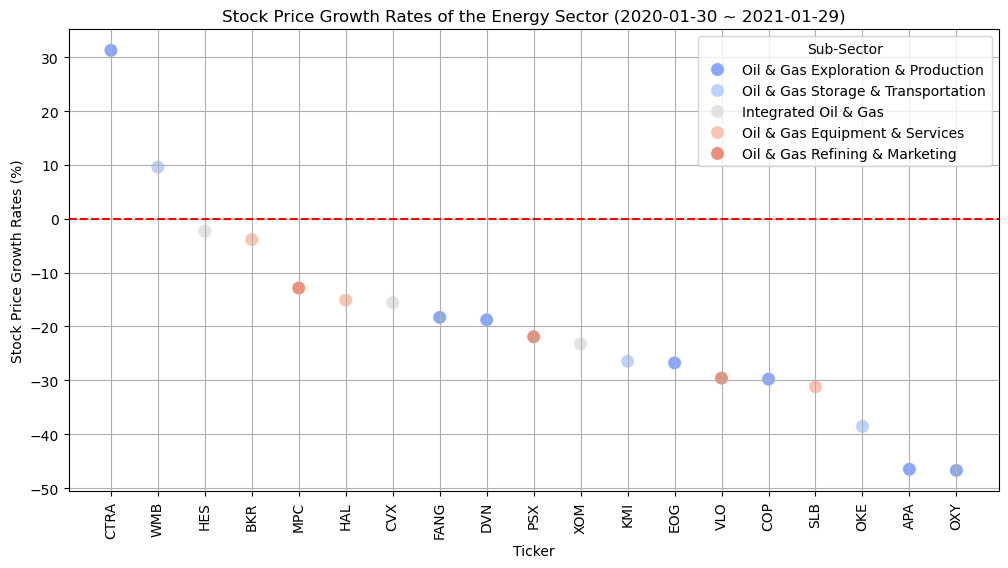

,Ticker,Company,Sector,Sector2,Addition,Growth Rate
128,CTRA,Coterra,Energy,Oil & Gas Exploration & Production,2008-06-23 00:00:00,31.268540
493,WMB,Williams Companies,Energy,Oil & Gas Storage & Transportation,1975-03-31 00:00:00,9.578501
228,HES,Hess Corporation,Energy,Integrated Oil & Gas,1984-05-31 00:00:00,-2.319043
55,BKR,Baker Hughes,Energy,Oil & Gas Equipment & Services,2017-07-07 00:00:00,-3.864053
298,MPC,Marathon Petroleum,Energy,Oil & Gas Refining & Marketing,2011-07-01 00:00:00,-12.865378
221,HAL,Halliburton,Energy,Oil & Gas Equipment & Services,1957-03-04 00:00:00,-15.111456
99,CVX,Chevron Corporation,Energy,Integrated Oil & Gas,1957-03-04 00:00:00,-15.561886
144,FANG,Diamondback Energy,Energy,Oil & Gas Exploration & Production,2018-12-03 00:00:00,-18.312051
142,DVN,Devon Energy,Energy,Oil & Gas Exploration & Production,2000-08-30 00:00:00,-18.766041
372,PSX,Phillips 66,Energy,Oil & Gas Refining & Marketing,2012-05-01 00:00:00,-21.909606


In [1376]:
# List Stock Price Growth Rates for the Energy Sector, Which Performed Weakly During COVID-19
plt.figure(figsize=(12, 6))
sns.scatterplot(data=weak_who_df, x="Ticker", y="Growth Rate", hue="Sector2", palette="coolwarm", s=100, alpha=0.8)
plt.axhline(0, color='red', linestyle='--')

plt.xticks(rotation=90)
plt.title("Stock Price Growth Rates of the Energy Sector (2020-01-30 ~ 2021-01-29)")
plt.xlabel("Ticker")
plt.ylabel("Stock Price Growth Rates (%)")
plt.legend(title="Sub-Sector", bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

weak_who_df

I visualized the stock price growth rates of the Energy sector using a Scatter Plot.

As it was the weakest sector during COVID-19, only two companies showed positive stock price growth. However, since other companies in the same sub-sectors showed negative growth, it was necessary to examine the two companies that increased individually.

In [1379]:
# Display the Top 5 Stocks with the Highest Growth Rates
print("weak_who_df TOP 5")
weak_who_df.head(5)

weak_who_df TOP 5


,Ticker,Company,Sector,Sector2,Addition,Growth Rate
128,CTRA,Coterra,Energy,Oil & Gas Exploration & Production,2008-06-23 00:00:00,31.268540
493,WMB,Williams Companies,Energy,Oil & Gas Storage & Transportation,1975-03-31 00:00:00,9.578501
228,HES,Hess Corporation,Energy,Integrated Oil & Gas,1984-05-31 00:00:00,-2.319043
55,BKR,Baker Hughes,Energy,Oil & Gas Equipment & Services,2017-07-07 00:00:00,-3.864053
298,MPC,Marathon Petroleum,Energy,Oil & Gas Refining & Marketing,2011-07-01 00:00:00,-12.865378


In [1381]:
# Display the Top 5 Stocks with the Lowest Growth Rates
print("weak_who_df BOTTOM 5")
weak_who_df.tail(5)

weak_who_df BOTTOM 5


,Ticker,Company,Sector,Sector2,Addition,Growth Rate
117,COP,ConocoPhillips,Energy,Oil & Gas Exploration & Production,1957-03-04 00:00:00,-29.773396
408,SLB,Schlumberger,Energy,Oil & Gas Equipment & Services,1957-03-04 00:00:00,-31.183166
355,OKE,Oneok,Energy,Oil & Gas Storage & Transportation,2010-03-15 00:00:00,-38.549583
37,APA,APA Corporation,Energy,Oil & Gas Exploration & Production,1997-07-28 00:00:00,-46.513511
351,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,1957-03-04 00:00:00,-46.711707


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


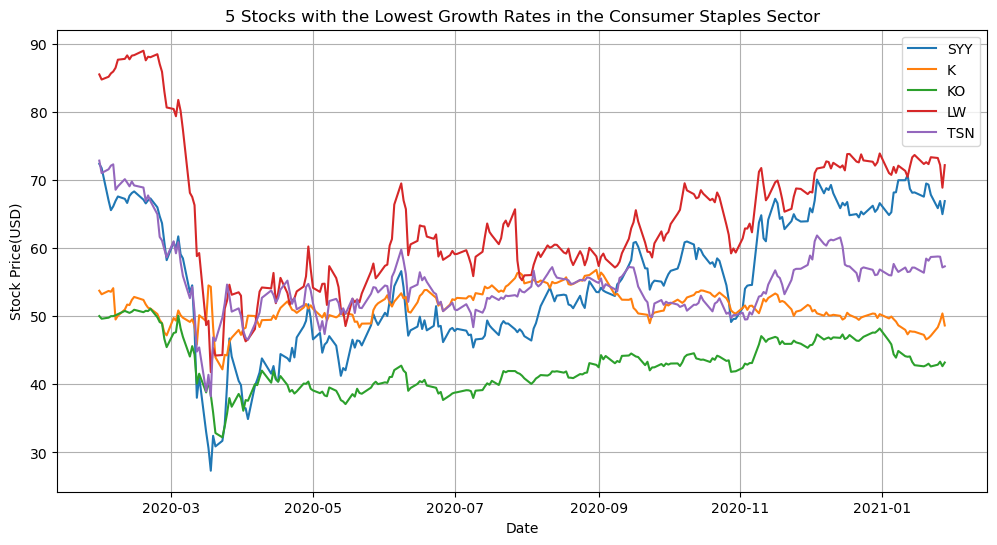

,Ticker,Company,Sector,Sector2,Addition,Growth Rate
430,SYY,Sysco,Consumer Staples,Food Distributors,1986-12-31 00:00:00,-7.554518
268,K,Kellanova,Consumer Staples,Packaged Foods & Meats,1989-09-11 00:00:00,-9.501502
112,KO,Coca-Cola Company (The),Consumer Staples,Soft Drinks & Non-alcoholic Beverages,1957-03-04 00:00:00,-13.639223
283,LW,Lamb Weston,Consumer Staples,Packaged Foods & Meats,2018-12-03 00:00:00,-15.587363
454,TSN,Tyson Foods,Consumer Staples,Packaged Foods & Meats,2005-08-10 00:00:00,-21.323042


In [1383]:
# Visualize the 5 Stocks with the Lowest Growth Rates in the Consumer Staples Sector
who_bottom_tickers = stong_who_df["Ticker"].tail(5).tolist()
plt.figure(figsize=(12,6))

for ticker in who_bottom_tickers:
    df = yf.download(ticker, start="2020-01-30", end="2021-01-29")
    plt.plot(df.index, df["Close"], label=ticker)

plt.legend()
plt.title("5 Stocks with the Lowest Growth Rates in the Consumer Staples Sector")
# plt.xticks(rotation = 30)
plt.xlabel("Date")
plt.ylabel("Stock Price(USD)")
plt.grid()
plt.show()

stong_who_df.tail(5)

The chart above shows the stock price trends of the 5 stocks with the lowest growth rates in the Consumer Staples sector, which performed strongly during the COVID-19 period.

Among them, Tyson Foods (TSN) shows the worst performance. Let's expand the period and take a closer look at the detailed chart of TSN below.

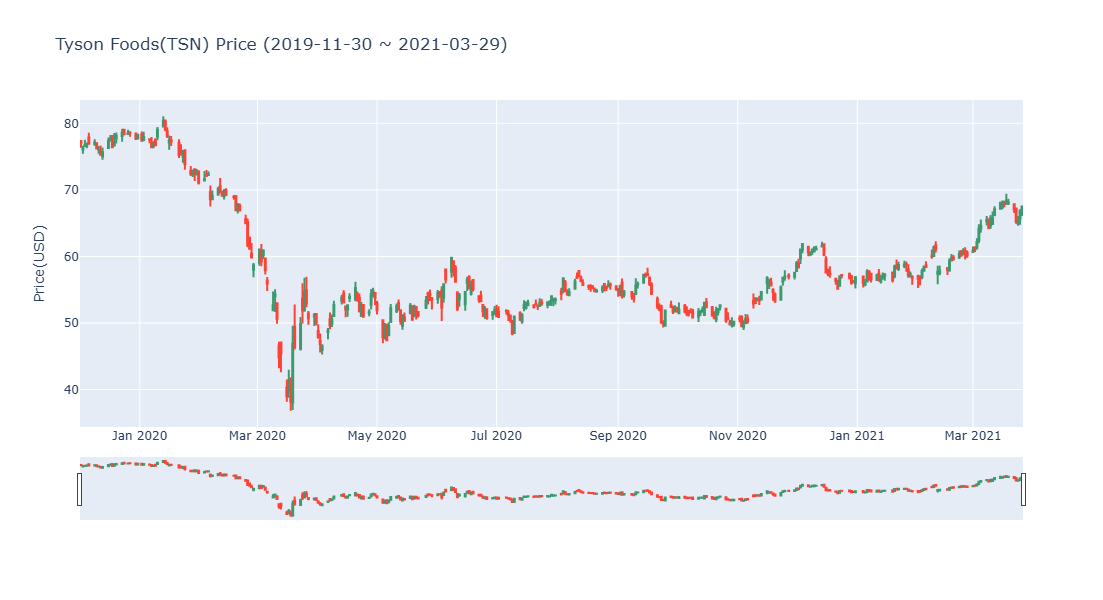

In [1386]:
# Display the Stock Price Chart for the Company with the Lowest Growth Rate in the Consumer Staples Sector, 
# Set to a Broader Date Range, and Analyze the Reasons Behind the Stock Price Decline.
tsn = yf.Ticker("TSN")
df  = tsn.history(start="2019-11-30", end="2021-03-29")

fig = go.Figure(go.Candlestick(x=df.index,
                open =df['Open'],
                high =df['High'],
                low  =df['Low'],
                close=df['Close']))

fig.update_layout(title      ='Tyson Foods(TSN) Price (2019-11-30 ~ 2021-03-29)',
                  yaxis_title='Price(USD)',
                  width      =1100,
                  height     =600)

fig.show()

From January 13, 2020, to March 2020, we can see a dip in stock prices over the span of about two months. The reasons for this include:

1. The meat processing industry is labor-intensive and highly vulnerable to the spread of COVID-19. Tyson Foods, being heavily focused on meat processing, was significantly affected by these industry characteristics.
2. Tyson Foods operated larger-scale production facilities compared to its competitors, which led to higher costs for hygiene measures and employee safety compared to other companies. 

Related article:

1. https://www.cfo.com/news/tyson-foods-shares-dive-on-15-profit-drop/656638/
2. https://www.foodprocessing.com/business-of-food-beverage/business-strategies/news/11305085/tyson-foods-stock-dips-on-covid-effect

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


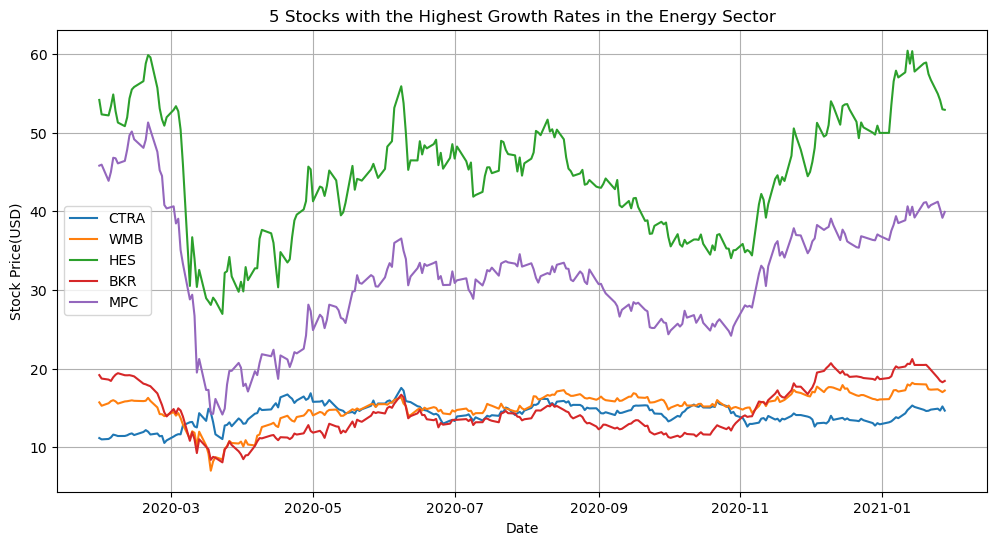

,Ticker,Company,Sector,Sector2,Addition,Growth Rate
128,CTRA,Coterra,Energy,Oil & Gas Exploration & Production,2008-06-23 00:00:00,31.268540
493,WMB,Williams Companies,Energy,Oil & Gas Storage & Transportation,1975-03-31 00:00:00,9.578501
228,HES,Hess Corporation,Energy,Integrated Oil & Gas,1984-05-31 00:00:00,-2.319043
55,BKR,Baker Hughes,Energy,Oil & Gas Equipment & Services,2017-07-07 00:00:00,-3.864053
298,MPC,Marathon Petroleum,Energy,Oil & Gas Refining & Marketing,2011-07-01 00:00:00,-12.865378


In [1389]:
# Visualize the 5 Stocks with the Highest Growth Rates in the Energy Sector
who_top_tickers = weak_who_df["Ticker"].head(5).tolist()
plt.figure(figsize=(12,6))

for ticker in who_top_tickers:
    df = yf.download(ticker, start="2020-01-30", end="2021-01-29")
    plt.plot(df.index, df["Close"], label=ticker)

plt.legend()
plt.title("5 Stocks with the Highest Growth Rates in the Energy Sector")
plt.xlabel("Date")
plt.ylabel("Stock Price(USD)")
plt.grid()
plt.show()

weak_who_df.head(5)

The chart above displays the stock price trends of the two best-performing stocks in terms of growth rate and the three least-declining stocks (among the negative growth stocks) within the Energy sector, which was one of the weakest sectors during the COVID-19 period.

Among them, Coterra (CTRA) and Williams Companies (WMB) were the only ones to record positive returns. Let's extend the time frame and examine the detailed charts of CTRA and WMB below.

[*********************100%***********************]  2 of 2 completed


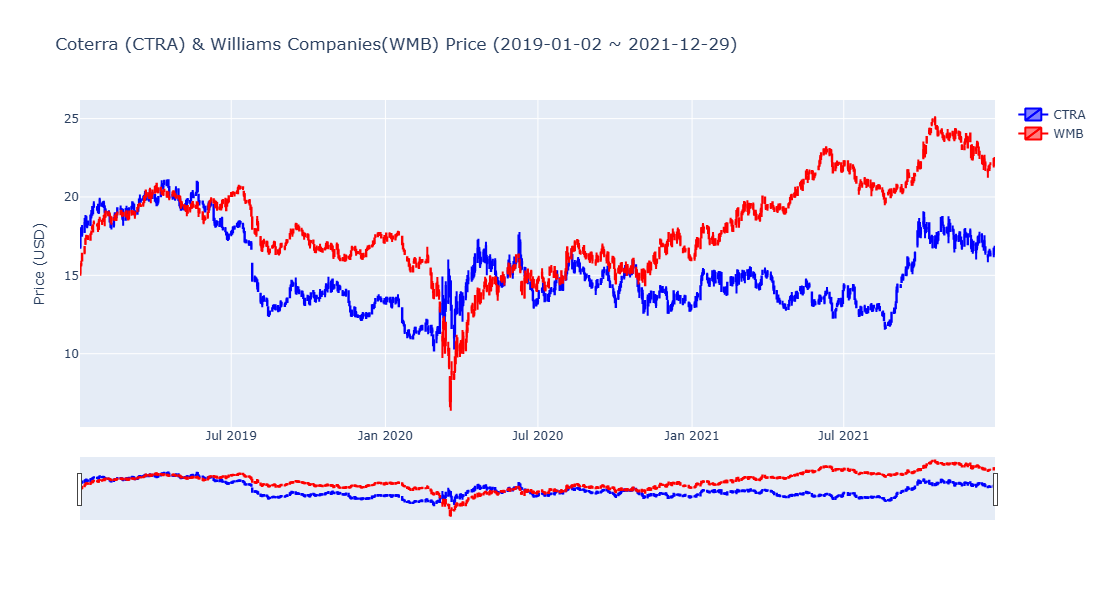

In [1308]:
# Extend The Date Range And Visualize The Stock Charts Of The Two Companies In The Energy Sector That Showed The Only Positive Growth Rate, 
# Followed By An Analysis Of The Reasons Behind Their Stock Price Increase
tickers = ["CTRA", "WMB"]
colors  = ["blue", "red"]

data = yf.download(tickers, start="2019-01-02", end="2021-12-29")

fig = go.Figure()
for i, ticker in enumerate(tickers):
    fig.add_trace(go.Candlestick(x=data.index,
                                open                 =data['Open'][ticker],
                                high                 =data['High'][ticker],
                                low                  =data['Low'][ticker],
                                close                =data['Close'][ticker],
                                name                 =ticker,
                                increasing_line_color=colors[i],
                                decreasing_line_color=colors[i]))

fig.update_layout(title      ='Coterra (CTRA) & Williams Companies(WMB) Price (2019-01-02 ~ 2021-12-29)',
                  yaxis_title='Price (USD)',
                  width      =1100,
                  height     =600)

fig.show()

WMB experienced a dipped decline in its stock price for about a month starting from February 20, but quickly recovered. Meanwhile, CTRA, which had the highest stock price growth rate, maintained a steady performance throughout the COVID-19 period. 

Additionally, these two companies shared several common characteristics.

1. A business structure focused on natural gas: Natural gas is an essential energy resource for heating and power generation, and its demand remained relatively stable during the pandemic.

Related link: (https://en.wikipedia.org/wiki/Coterra), (https://en.wikipedia.org/wiki/Williams_Companies)

2. Stable financial statements and an active shareholder return policy: Even during the pandemic, the company protected shareholder value by maintaining and increasing dividends, continuously attracting investor interest. Additionally, cost reductions helped secure profitability and maintain investor confidence.

Related article: (https://seekingalpha.com/article/4335243-williams-companies-covidminus-19-response-highlights-best-in-class-midstream-positioning),
(https://www.prnewswire.com/news-releases/cabot-oil--gas-corporation-provides-operational-update-301147978.html)

#### Conclusion

1. During a recession, stocks related to essential goods and services, such as natural gas for heating, tend to perform well, reaffirming their resilience.

2. However, a company's stable cash flow and financial health must accompany this, as a company's credibility plays a crucial role in determining stock performance during recession.

3. In a global pandemic like COVID-19, even sectors typically strong during recessions can be vulnerable if they rely heavily on labor-intensive industries.